Hopkins.py
metric.py
visual_assessment_of_tendency.py

In [3]:
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Importando a biblioteca dos arquivos, completos

In [4]:
from hopkins import *
from metric import *
from visual_assessment_of_tendency import *

In [5]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [6]:
iris = datasets.load_iris()
clust1 = scale(iris.data)
clust2 = scale(np.random.rand(150,4))
X = iris.data
y = iris.target

In [7]:
print(clust2)

[[ 6.09706475e-01 -1.35426561e+00 -1.58137564e+00 -1.48730940e+00]
 [ 1.32413543e+00 -1.12781520e+00 -9.16931786e-01  1.23164539e-01]
 [-1.22146652e+00 -1.07245576e+00 -1.12803046e+00 -4.39740950e-01]
 [-1.75035561e+00  1.09313062e+00  8.87906738e-01  3.66285955e-02]
 [-5.59277021e-01 -1.79383555e+00 -4.49221141e-01 -8.66111335e-01]
 [-2.92541052e-01 -3.30506709e-01  1.54442952e+00 -1.50789804e+00]
 [ 1.29108818e+00 -1.74089743e-01 -1.45348935e+00  4.83290714e-01]
 [ 1.61988436e+00  4.06677995e-01  1.54298303e+00  1.26297989e+00]
 [-1.26804289e-01 -4.07768371e-01  6.15067361e-01 -6.17781785e-03]
 [-5.54642040e-04 -1.89653798e-01  6.54992460e-01 -1.02394555e+00]
 [ 3.58203109e-01 -9.24022561e-01  1.60934267e+00 -1.18672288e+00]
 [ 8.82550295e-01  1.63250365e+00  1.60283125e+00 -1.37449295e+00]
 [ 3.87132082e-01 -6.48474581e-01  1.10156706e+00  2.40938337e-01]
 [ 1.10678366e+00 -1.08183761e-02  8.49250094e-01 -1.21945604e-01]
 [-9.58410390e-01 -8.60011003e-01 -5.48105815e-01 -6.63907846e

Construção do gráfico

Serve para nos indicar o número ideal de cluster para os dados

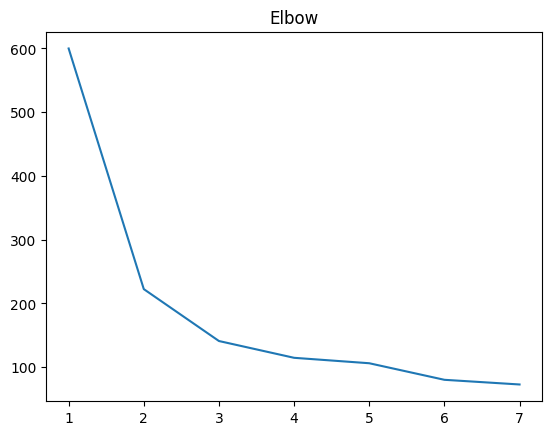

In [8]:
inertia = []

for i in range(1,8):
  kmeans = KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(clust1)
  inertia.append(kmeans.inertia_)

plt.plot(range(1,8), inertia)
plt.title("Elbow")
plt.show()

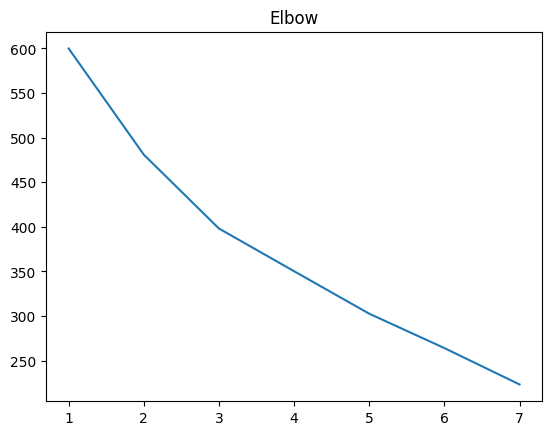

In [9]:
inertia = []

for i in range(1,8):
  kmeans = KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(clust2)
  inertia.append(kmeans.inertia_)

plt.plot(range(1,8), inertia)
plt.title("Elbow")
plt.show()

In [11]:
hopkins(clust1,150)

np.float64(0.18597610782415702)

In [12]:
hopkins(clust2,150)

np.float64(0.5104136247742006)

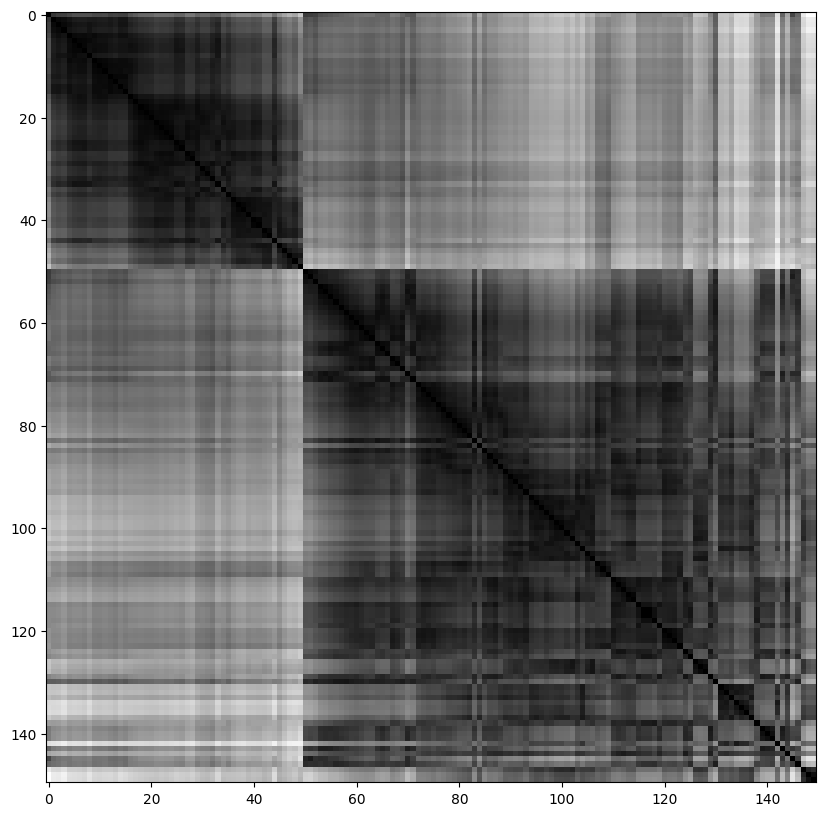

In [14]:
vat(clust1)

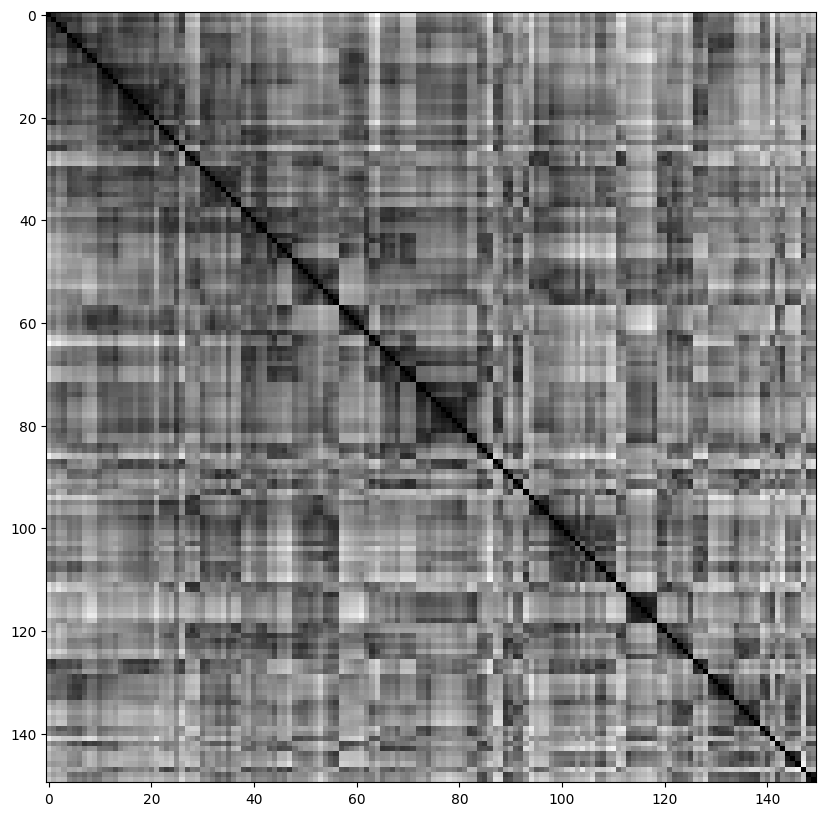

In [16]:
vat(clust2)

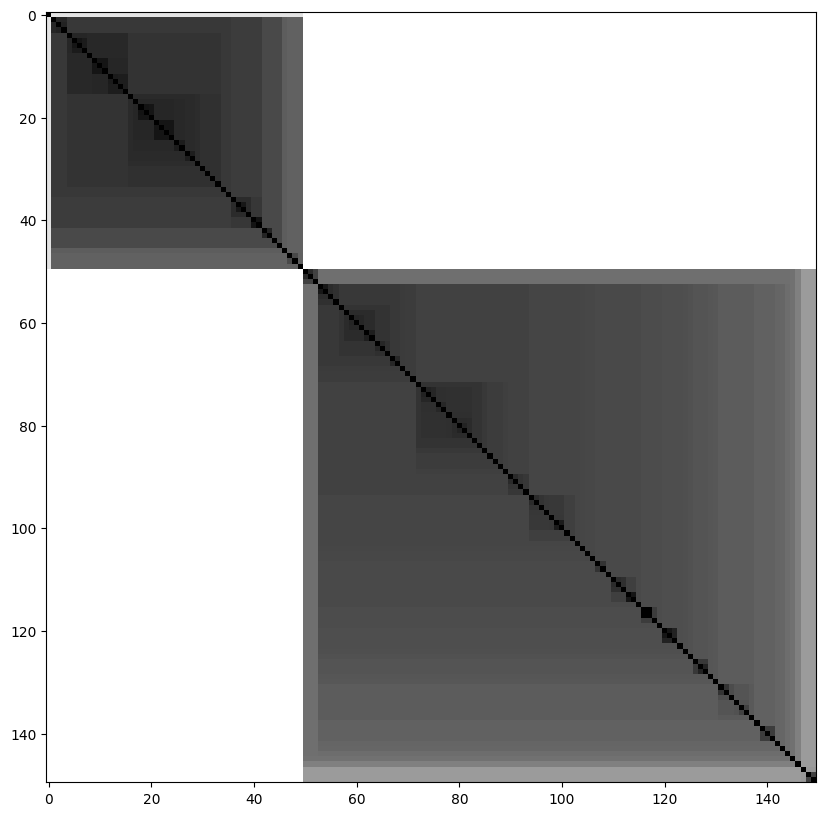

In [17]:
ivat(clust1)

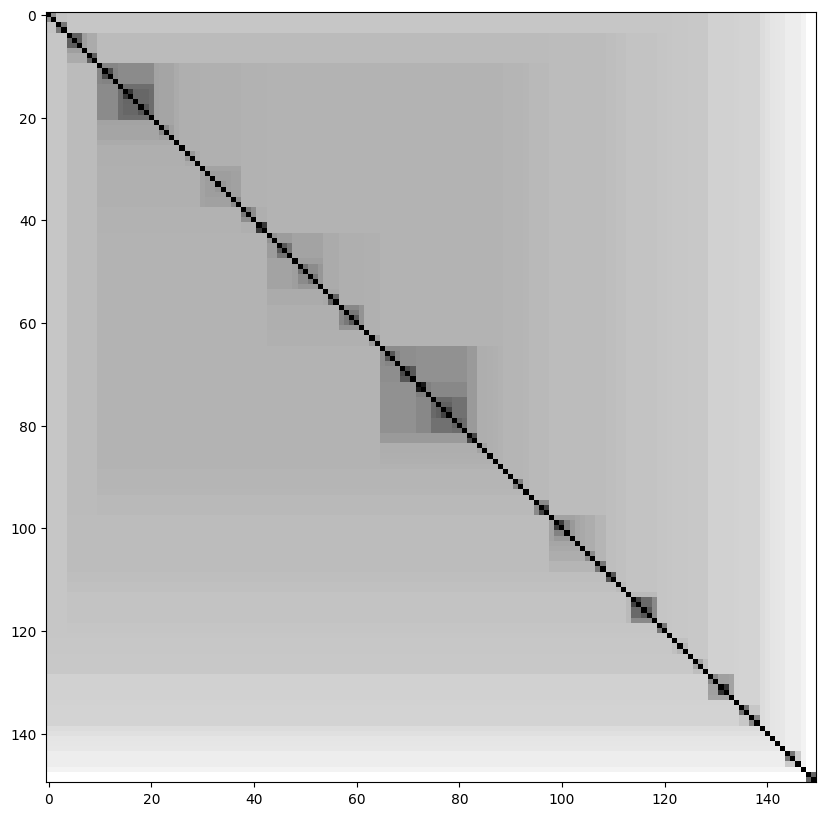

In [18]:
ivat(clust2)

Cluster1

In [21]:
m = assess_tendency_by_metric(clust1, 'silhouette', 5)
print(m)

(np.int64(2), array([0.58175005, 0.45653523, 0.38504541, 0.34194697]))


In [22]:
m = assess_tendency_by_metric(clust1, 'davies_bouldin', 5)
print(m)

(np.int64(2), array([0.59331269, 0.83359495, 0.86865444, 0.99319558]))


In [23]:
m = assess_tendency_by_metric(clust1, 'calinski_harabasz', 5)
print(m)

(np.int64(2), array([251.34933946, 241.9044017 , 206.55006422, 168.88404855]))


Cluster2

In [24]:
m = assess_tendency_by_metric(clust2, 'silhouette', 5)
print(m)

(np.int64(5), array([0.19162516, 0.19225482, 0.21637752, 0.22218812]))


In [25]:
m = assess_tendency_by_metric(clust2, 'davies_bouldin', 5)
print(m)

(np.int64(5), array([1.94630775, 1.68046318, 1.40372226, 1.20230736]))


In [26]:
m = assess_tendency_by_metric(clust2, 'calinski_harabasz', 5)
print(m)

(np.int64(5), array([35.8358337 , 36.82321742, 32.25182453, 39.6520943 ]))


Busca a média dos três métodos listados acima

In [27]:
m = assess_tendency_by_mean_metric_score(clust1, 5)
print(m)

2.0


In [28]:
m = assess_tendency_by_mean_metric_score(clust2, 5)
print(m)

5.0
